<a href="https://colab.research.google.com/github/anujyadav10457/Chebyshew_filter/blob/main/22B3950_chebyshew_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anuj Yadav
# 22B3950
# Filter Number 75





# All the data are defined in each chunk with the comment

# To understand better my code remeber few terminology
p1_low = low side of passband of group 1 filter  
p1_high = high side of passband of group 1 filter  
p2_low = low side of passband of group 2 filter   
p2_high = high side of passband of group 2  filter   
s1_low = low side of stopband of group 1 filter  
s1_high = high side of stopband of group 1 filter  
s2_low = low side of stopband of group 2 filter   
s2_high = high side of stopband of group 2  filter  

In [ ]:
#Importing the library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
# This is the sampling frequency
sampling_frequency = 630000

#Since my M is 75, so 75 = 11*6 + 9
Q = 6
R = 9

In [ ]:
# This is bandpass frequency of both
fp1_low = 40000 + 5000 * Q
fp1_high = 70000 + 5000 * Q
fp2_low = 170000 + 5000 * R
fp2_high = 200000 + 5000 * R
print(fp1_low)
print(fp1_high)
print(fp2_low)
print(fp2_high)

# Transition_band as asked
transition_band = 5000

# This is stopband frequency after transition
fs1_low = fp1_low - transition_band
fs1_high = fp1_high + transition_band
fs2_low = fp2_low - transition_band
fs2_high = fp2_high + transition_band
print(fs1_low)
print(fs1_high)
print(fs2_low)
print(fs2_high)

70000
100000
215000
245000
65000
105000
210000
250000


# Unnormalized discrete time filter

In [ ]:
# frequency now in omega(Unnormalized discrete time filter specifications and using two bandpass monotonically)
wp1_low, wp1_high, wp2_low, wp2_high = 2 * np.pi * np.array([fp1_low, fp1_high, fp2_low, fp2_high])
ws1_low, ws1_high, ws2_low, ws2_high = 2 * np.pi * np.array([fs1_low, fs1_high, fs2_low, fs2_high])
print(wp1_low)
print(wp1_high)
print(wp2_low)
print(wp2_high)
print(ws1_low)
print(ws1_high)
print(ws2_low)
print(ws2_high)

439822.971502571
628318.5307179586
1350884.841043611
1539380.4002589986
408407.04496667313
659734.4572538566
1319468.9145077132
1570796.3267948965


# Normalized discrete time filter

In [ ]:
#  Normalized discrete time filter specifications
norm_wp1_low, norm_wp1_high, norm_wp2_low, norm_wp2_high = np.array([wp1_low, wp1_high, wp2_low, wp2_high])/ sampling_frequency
norm_ws1_low, norm_ws1_high, norm_ws2_low, norm_ws2_high = np.array([ws1_low, ws1_high, ws2_low, ws2_high])/ sampling_frequency
print(norm_wp1_low)
print(norm_wp1_high)
print(norm_wp2_low)
print(norm_wp2_high)
print(norm_ws1_low)
print(norm_ws1_high)
print(norm_ws2_low)
print(norm_ws2_high)

0.6981317007977318
0.9973310011396168
2.1442616524501763
2.443460952792061
0.648265150740751
1.0471975511965979
2.0943951023931957
2.4933275028490423


In [ ]:
#Analog filter specification
sigma_plow_1, sigma_phigh_1, sigma_plow_2, sigma_phigh_2 = np.tan(np.array([norm_wp1_low, norm_wp1_high, norm_wp2_low, norm_wp2_high])/2)
sigma_slow_1, sigma_shigh_1, sigma_slow_2, sigma_shigh_2 = np.tan(np.array([norm_ws1_low, norm_ws1_high, norm_ws2_low, norm_ws2_high])/2)
print(sigma_plow_1)
print(sigma_phigh_1)
print(sigma_plow_2)
print(sigma_phigh_2)
print(sigma_slow_1)
print(sigma_shigh_1)
print(sigma_slow_2)
print(sigma_shigh_2)

0.36397023426620234
0.5445709751651733
1.836307929736231
2.7474774194546216
0.33598213147817674
0.5773502691896258
1.7320508075688776
2.9763487587879465


In [ ]:
# This is sigma_not and Bandwidth for both filter
sigma_not_1 = np.sqrt(sigma_plow_1 * sigma_phigh_1)
sigma_not_2 = np.sqrt(sigma_plow_2 * sigma_phigh_2)
B1 = sigma_phigh_1 - sigma_plow_1
B2 = sigma_phigh_2 - sigma_plow_2
print(sigma_not_1)
print(sigma_not_2)
print(B1)
print(B2)

0.44520514979663295
2.2461555093349523
0.18060074089897094
0.9111694897183906


In [ ]:
# frequency transformation
w,x,y,z = (np.array([sigma_plow_1, sigma_phigh_1, sigma_slow_1, sigma_shigh_1])**2 -sigma_not_1**2)/B1
sigma_l_plow_1, sigma_l_phigh_1, sigma_l_slow_1, sigma_l_shigh_1 = np.array([w,x,y,z])/np.array([sigma_plow_1, sigma_phigh_1, sigma_slow_1, sigma_shigh_1])
w,x,y,z = (np.array([sigma_plow_2, sigma_phigh_2, sigma_slow_2, sigma_shigh_2])**2 -sigma_not_2**2)/B2
sigma_l_plow_2, sigma_l_phigh_2, sigma_l_slow_2, sigma_l_shigh_2 = np.array([w,x,y,z])/np.array([sigma_plow_2, sigma_phigh_2, sigma_slow_2, sigma_shigh_2])
print(sigma_l_plow_1)
print(sigma_l_phigh_1)
print(sigma_l_slow_1)
print(sigma_l_shigh_1)
print(sigma_l_plow_2)
print(sigma_l_phigh_2)
print(sigma_l_slow_2)
print(sigma_l_shigh_2)

-1.0
1.0
-1.4061564039855219
1.295922654441079
-1.0
1.0
-1.2959226544410762
1.4061564039855234


In [ ]:
# sigma_s
sigma_l_s1 = np.min(np.abs(np.array([sigma_l_slow_1, sigma_l_shigh_1])))
sigma_l_s2 = np.min(np.abs(np.array([sigma_l_slow_2, sigma_l_shigh_2])))
print(sigma_l_s1)
print(sigma_l_s2)

1.295922654441079
1.2959226544410762


In [ ]:
# define D1 and D2
D1 = (1/(1-0.15)**2)-1
D2 = (1/(0.15)**2)-1
print(D1)
print(D2)

0.3840830449826991
43.44444444444444


In [ ]:
# find the suitable order I have to use
N1 = np.arccosh(np.sqrt(D2/D1))/(np.arccosh(sigma_l_s1))
N2 = np.arccosh(np.sqrt(D2/D1))/(np.arccosh(sigma_l_s2))
print(N1)
print(N2)

4.065332625497407
4.065332625497424


In [ ]:
# Taking ceil to make integer
N1 = int(np.ceil(N1))
N2 = int(np.ceil(N2))
epsilon = np.sqrt(D1)
print(N1)
print(N2)
print(epsilon)

5
5
0.6197443384031024


In [ ]:
# Since we find the N and epsilon we can find all the poles now
poles1 = []
poles2 = []

for k in range(N1):
  Ak = (2*k+1) * np.pi / (2*N1)
  Bk = (1/N1) * np.arcsinh(1/epsilon)
  pole1 = -np.sin(Ak)*np.sinh(Bk) + 1j * np.cos(Ak) * np.cosh(Bk)
  poles1.append(pole1)

for k in range(N2):
  Ak = (2*k+1) * np.pi / (2*N2)
  Bk = (1/N2) * np.arcsinh(1/epsilon)
  pole2 = -np.sin(Ak)*np.sinh(Bk) + 1j * np.cos(Ak) * np.cosh(Bk)
  poles2.append(pole2)

print("Poles 1:", poles1)
print("Poles 2:", poles2)

Poles 1: [(-0.07845376807107632+0.9812285332931279j), (-0.2053946313555791+0.6064325843063608j), (-0.25388172656900554+6.317491978345034e-17j), (-0.2053946313555791-0.6064325843063607j), (-0.07845376807107635-0.9812285332931279j)]
Poles 2: [(-0.07845376807107632+0.9812285332931279j), (-0.2053946313555791+0.6064325843063608j), (-0.25388172656900554+6.317491978345034e-17j), (-0.2053946313555791-0.6064325843063607j), (-0.07845376807107635-0.9812285332931279j)]


In [ ]:
#plotting lowpass filter of given specification
sigma = np.linspace(-2, 2, 1000)
mag1 = []
mag2= []

poles1 = np.array(poles1)
poles2 = np.array(poles2)
for s in sigma * 1j:
  numerator1 = np.prod(poles1)
  denominator1 = np.prod(s - poles1)
  h1_s = numerator1 / denominator1
  numerator2 = np.prod(poles2)
  denominator2 = np.prod(s - poles2)
  h2_s = numerator2 / denominator2
  mag1.append(np.abs(h1_s))
  mag2.append(np.abs(h2_s))


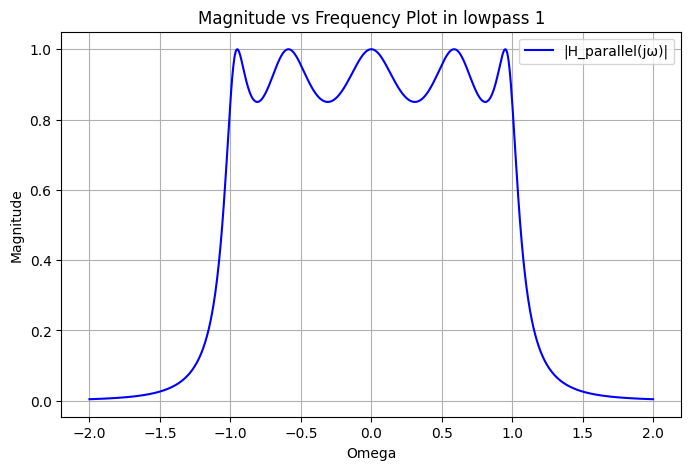

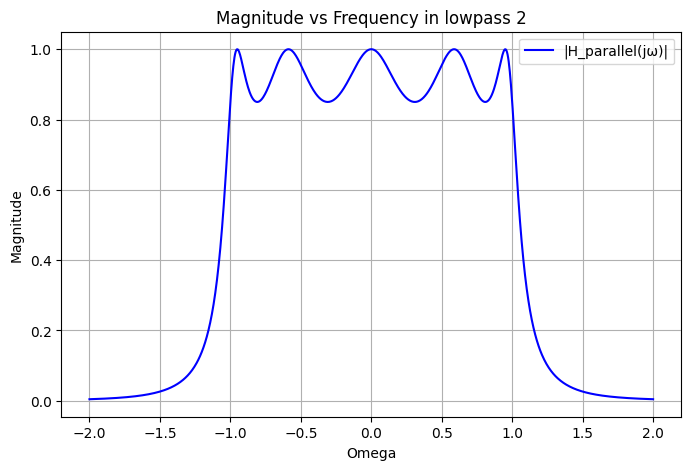

In [ ]:
mag1 = np.array(mag1)
mag2 = np.array(mag2)


plt.figure(figsize=(8, 5))
plt.plot(sigma, mag1, label="|H_parallel(jω)|", color='b')
plt.xlabel("Omega")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Frequency Plot in lowpass 1")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(sigma, mag2, label="|H_parallel(jω)|", color='b')
plt.xlabel("Omega")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Frequency in lowpass 2")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Converting lowpass to bandpass and then plotting the magnitude response
sigma = np.linspace(0.01, 4, 1000)
mag1 = []
mag2= []
mag3 = []


poles1 = np.array(poles1)
poles2 = np.array(poles2)
for s in sigma * 1j:
  s_l1 = (s**2 + sigma_not_1**2) / (B1 * s)
  numerator1 = np.prod(poles1)
  denominator1 = np.prod(s_l1 - poles1)
  h1_s = numerator1 / denominator1

  s_l2 = (s**2 + sigma_not_2**2) / (B2 * s)
  numerator2 = np.prod(poles2)
  denominator2 = np.prod(s_l2 - poles2)
  h2_s = numerator2 / denominator2
  h_parallel_s = h1_s + h2_s
  mag1.append(np.abs(h1_s))
  mag2.append(np.abs(h2_s))
  mag3.append(np.abs(h_parallel_s))

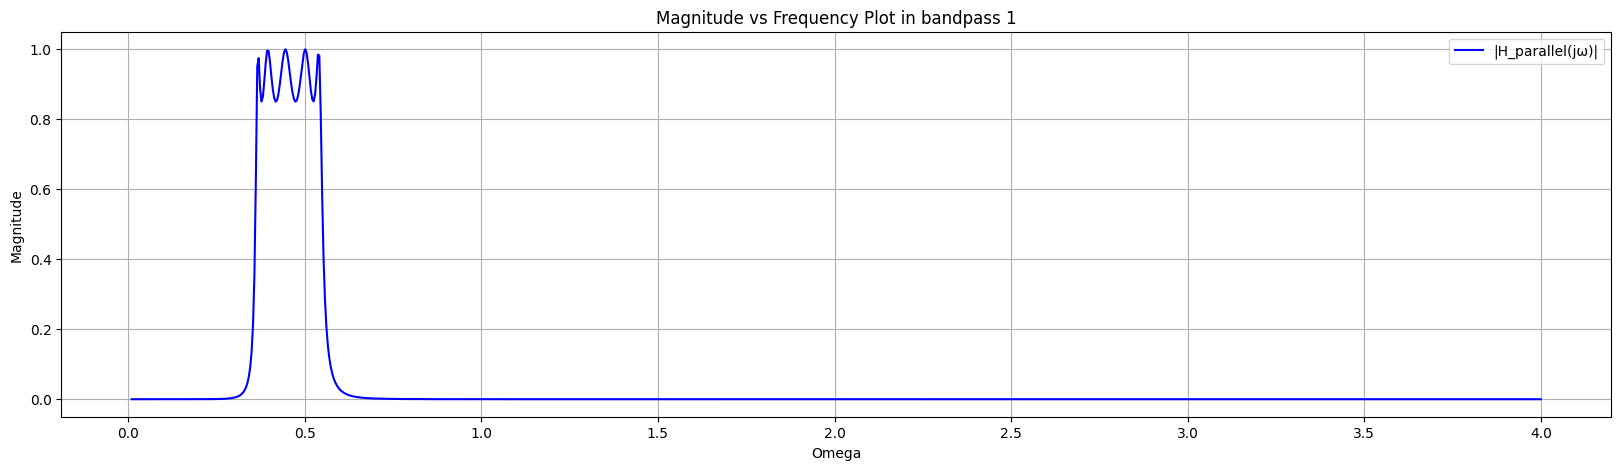

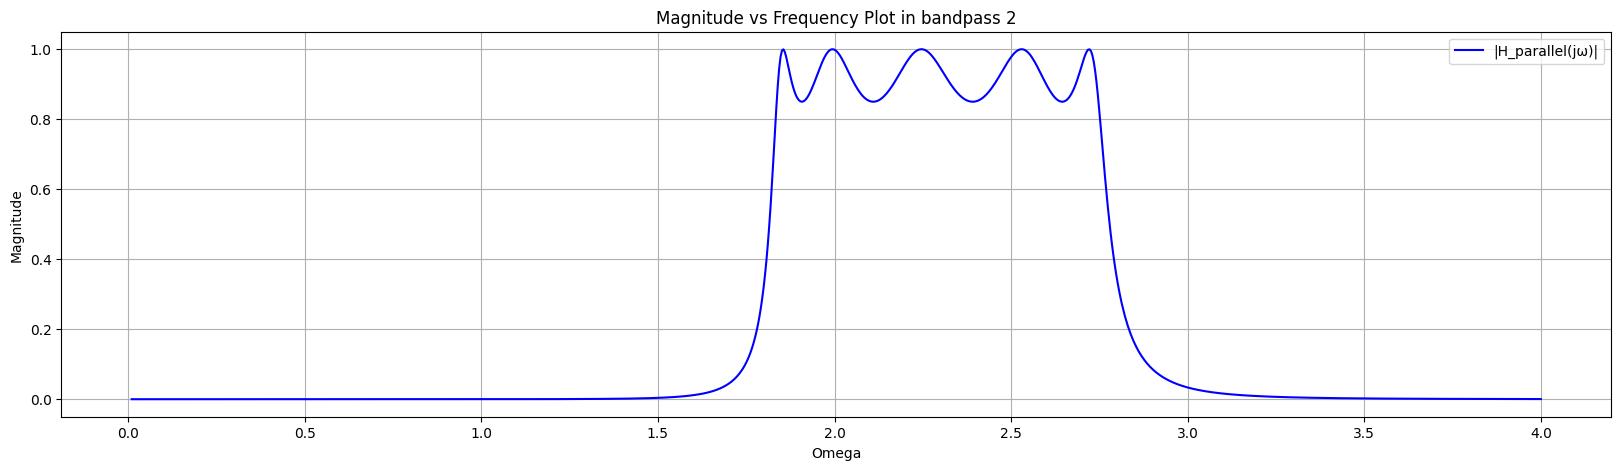

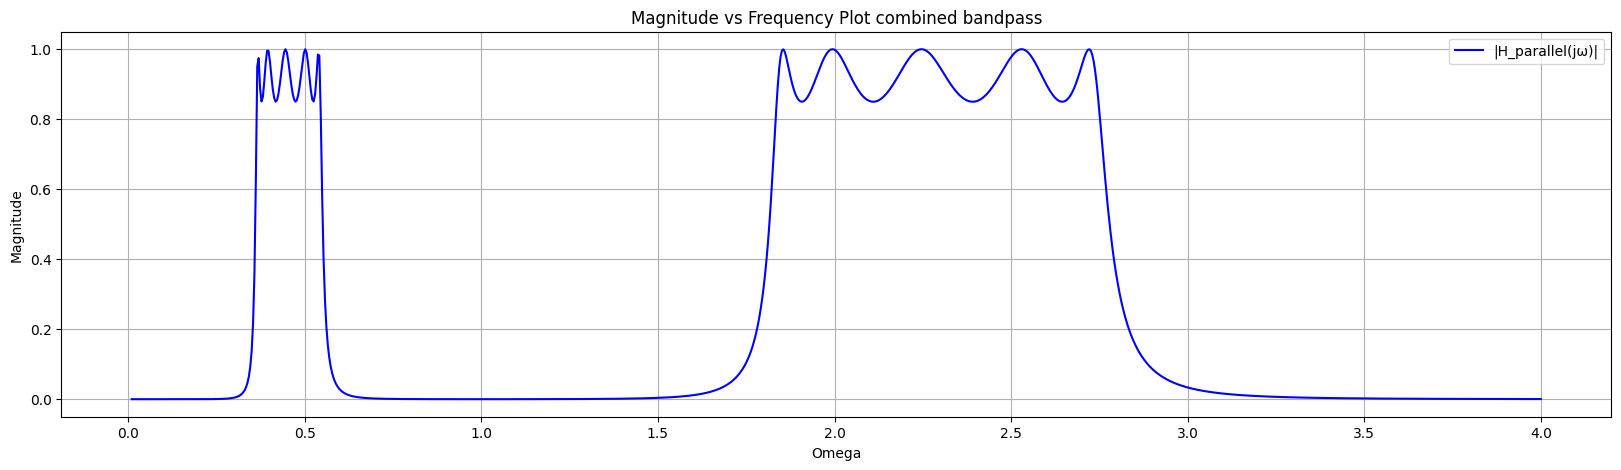

In [ ]:

 mag1 = np.array(mag1)
mag2 = np.array(mag2)
mag3 = np.array(mag3)


plt.figure(figsize=(20, 5))
plt.plot(sigma, mag1, label="|H_parallel(jω)|", color='b')
plt.xlabel("Omega")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Frequency Plot in bandpass 1")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(sigma, mag2, label="|H_parallel(jω)|", color='b')
plt.xlabel("Omega")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Frequency Plot in bandpass 2")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(sigma, mag3, label="|H_parallel(jω)|", color='b')
plt.xlabel("Omega")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Frequency Plot combined bandpass")
plt.grid(True)
plt.legend()
plt.show()
